# **Clustering Analysis:**

## **Data Preprocessing:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing dataset
data = pd.read_excel('EastWestAirlines.xlsx',sheet_name='data')

# Column rename.
data.rename(columns={'ID#':'ID', 'Award?':'Award'}, inplace=True)

#Set ID as Index Column
data.set_index('ID',inplace=True)
data

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1


In [ ]:
data.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
1,28143,0,1,1,1,174,1,0,0,7000,0
2,19244,0,1,1,1,215,2,0,0,6968,0
3,41354,0,1,1,1,4123,4,0,0,7034,0
4,14776,0,1,1,1,500,1,0,0,6952,0
5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [ ]:
data.tail()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
ID,,,,,,,,,,,
4017,18476,0,1,1,1,8525,4,200,1,1403,1
4018,64385,0,1,1,1,981,5,0,0,1395,1
4019,73597,0,3,1,1,25447,8,0,0,1402,1
4020,54899,0,1,1,1,500,1,500,1,1401,0
4021,3016,0,1,1,1,0,0,0,0,1398,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [ ]:
#Statistical Summery
data.describe()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
count,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [ ]:
#Check for null values
data.isnull().sum()

,0
Balance,0
Qual_miles,0
cc1_miles,0
cc2_miles,0
cc3_miles,0
Bonus_miles,0
Bonus_trans,0
Flight_miles_12mo,0
Flight_trans_12,0
Days_since_enroll,0


In [ ]:
# Detect and cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap the outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return lower_bound, upper_bound

# As dataset contains only numerical features
for column in data.columns:
    cap_outliers(data, column)

In [ ]:
# Feature scaling
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

# Preview the scaled data
print(scaled_df.head())

    Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0 -0.607258         0.0  -0.769578        0.0        0.0    -0.843091   
1 -0.758947         0.0  -0.769578        0.0        0.0    -0.840822   
2 -0.382070         0.0  -0.769578        0.0        0.0    -0.624581   
3 -0.835106         0.0  -0.769578        0.0        0.0    -0.825052   
4  0.579265         0.0   1.409471        0.0        0.0     1.543191   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
0    -1.148854          -0.604313        -0.626143           1.395454   
1    -1.039133          -0.604313        -0.626143           1.379957   
2    -0.819689          -0.604313        -0.626143           1.411920   
3    -1.148854          -0.604313        -0.626143           1.372208   
4     1.594189           2.034489         2.020176           1.363975   

      Award  
0 -0.766919  
1 -0.766919  
2 -0.766919  
3 -0.766919  
4  1.303918  


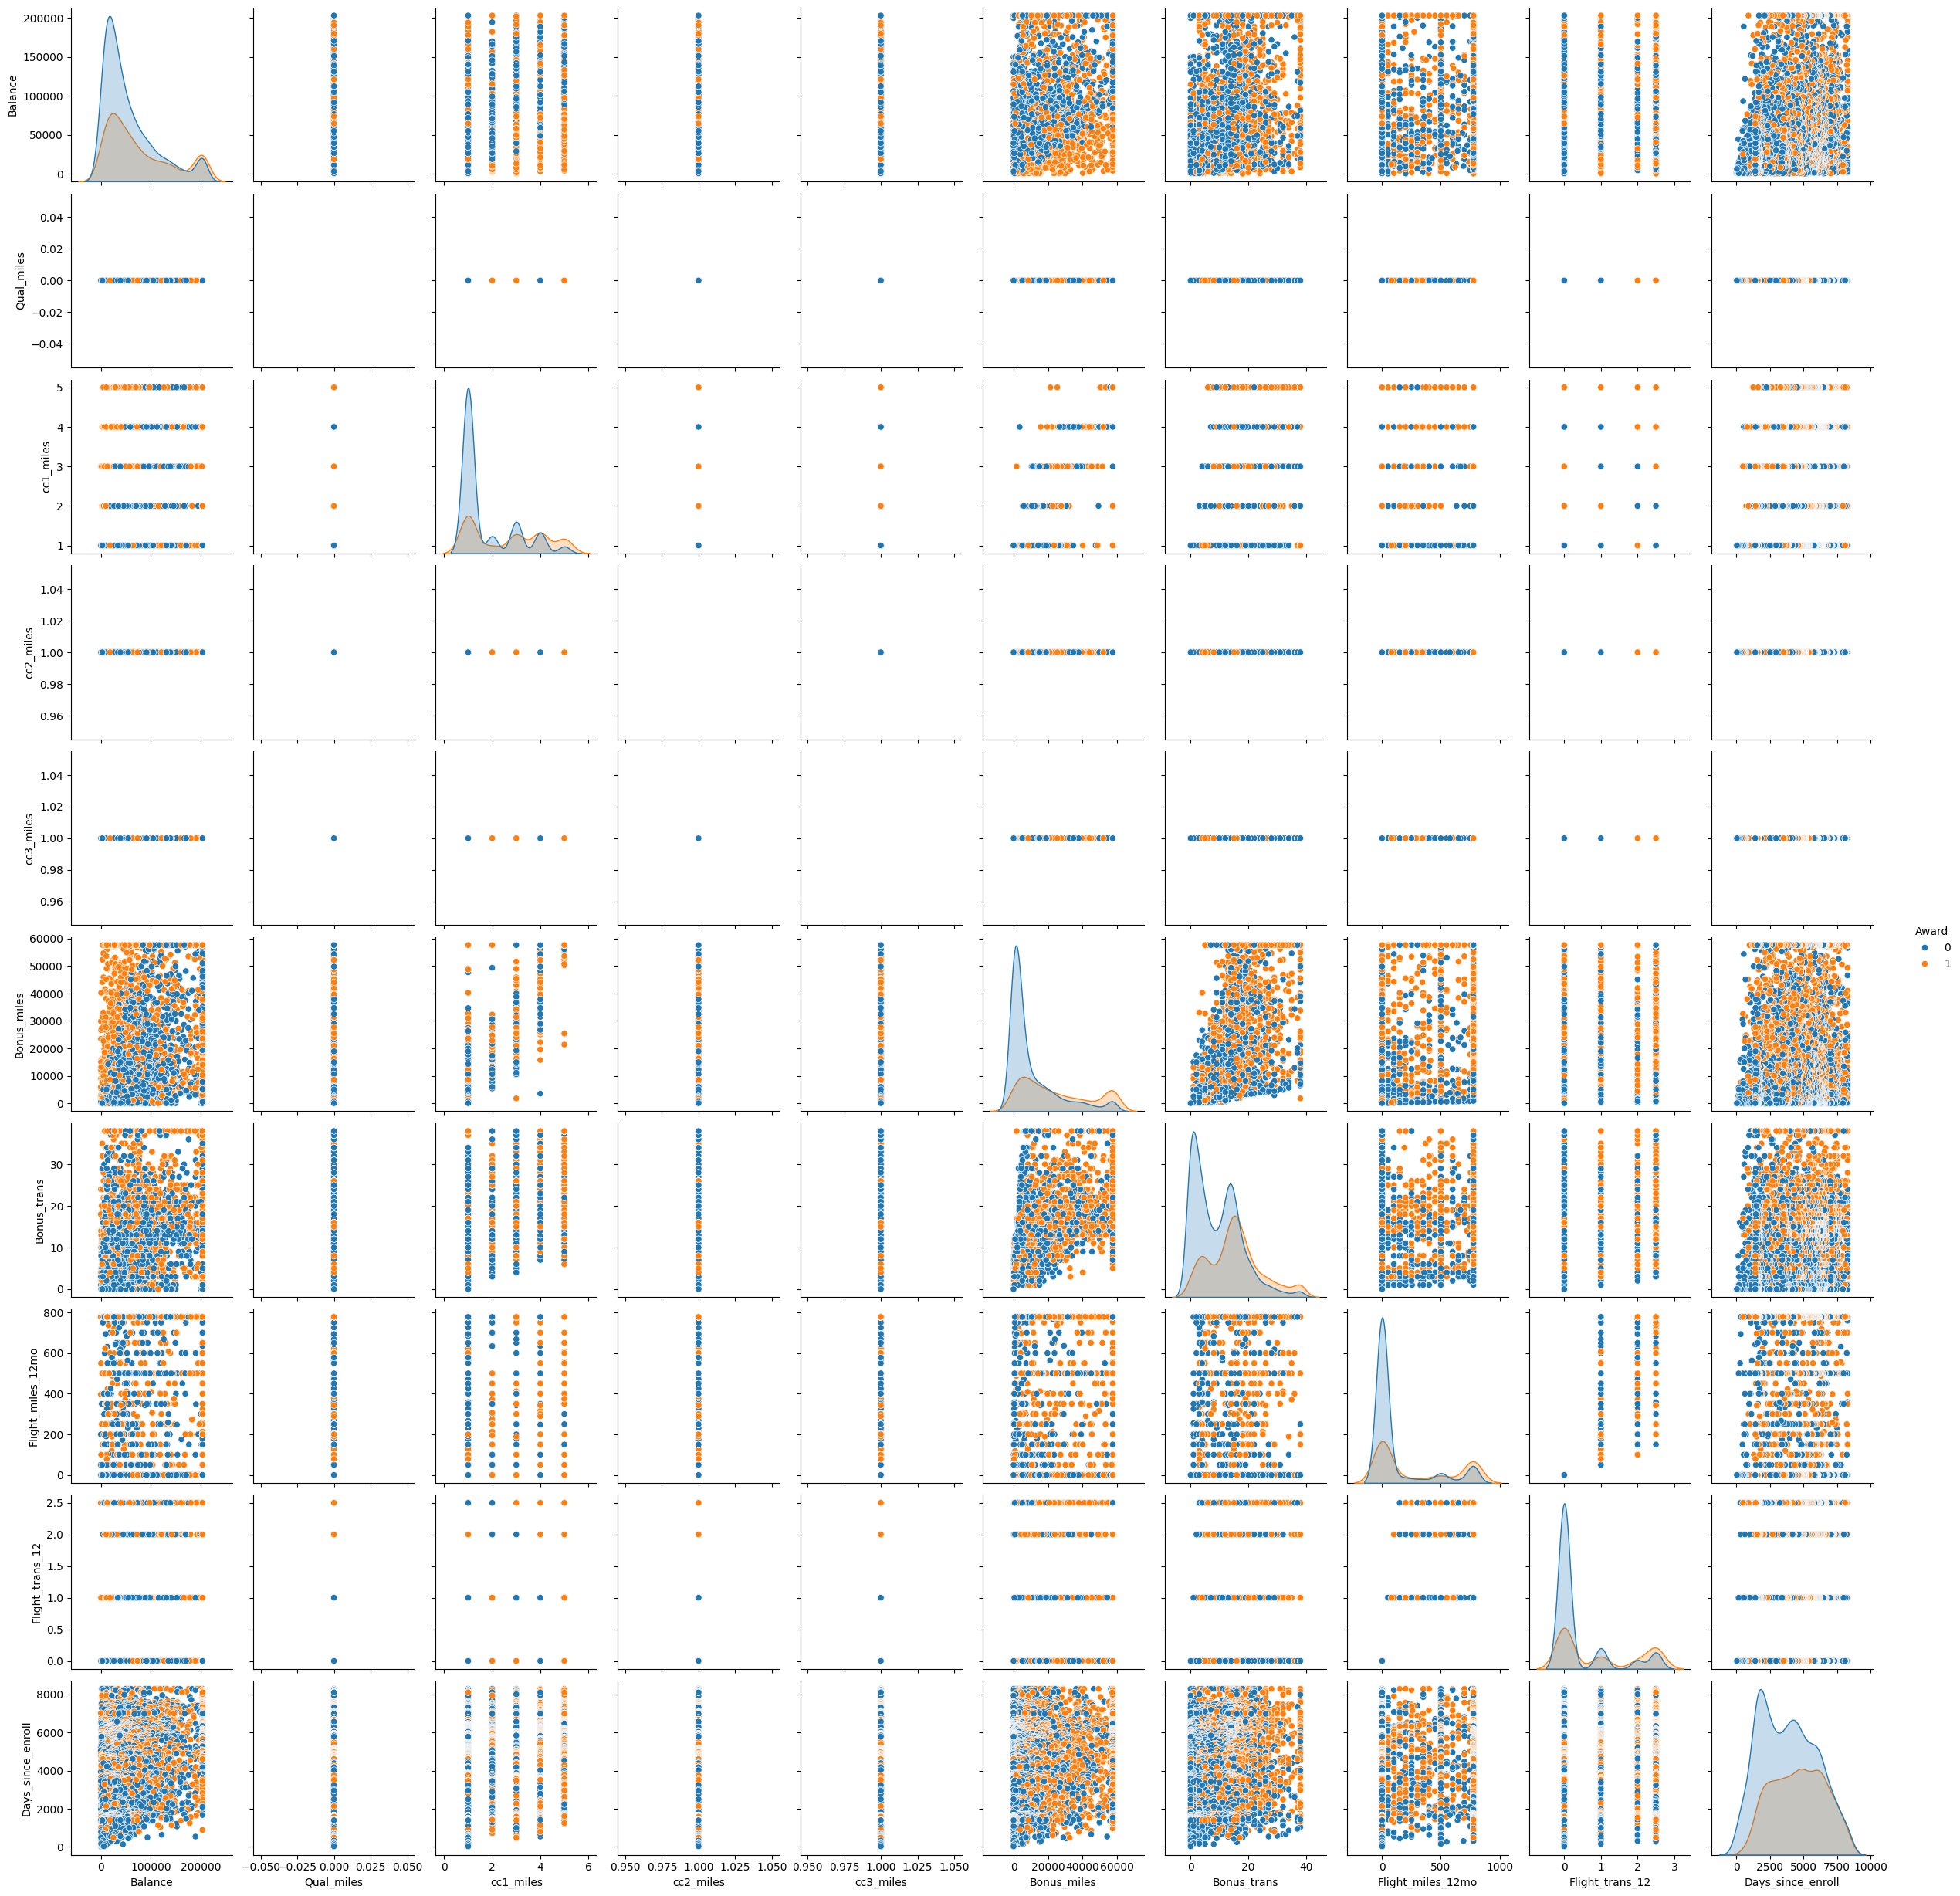

In [ ]:
#Pairplot
sns.pairplot(data, hue="Award")
plt.show()

## **Implementing Clustering Algorithms:**

## **K-Means Clustering:**

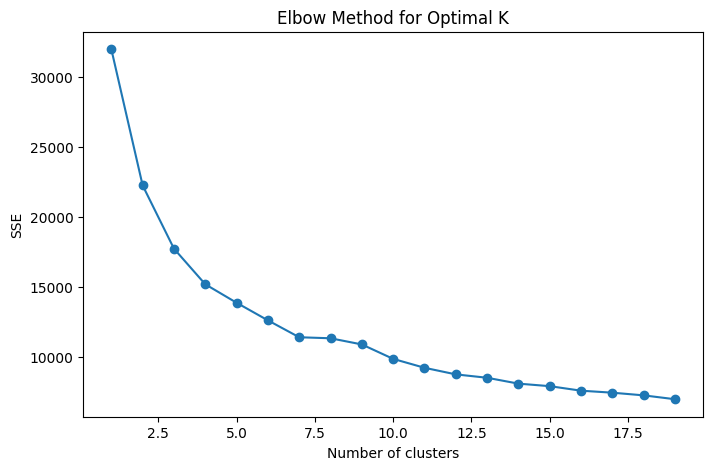

Text(0.5, 1.0, 'K-Means Clustering')

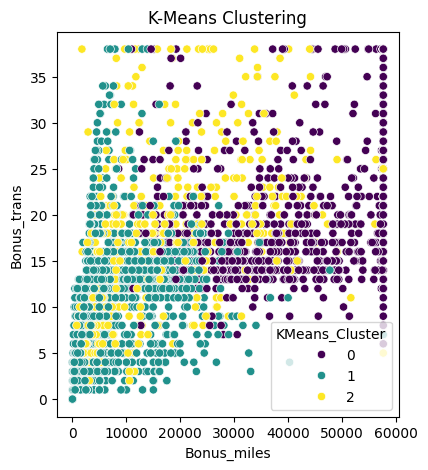

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
sse = []
k_values = range(1, 20)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=7)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=7)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_df)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=data, x="Bonus_miles", y="Bonus_trans", hue="KMeans_Cluster", palette="viridis")
plt.title('K-Means Clustering')

## **Hierarchical Clustering:**

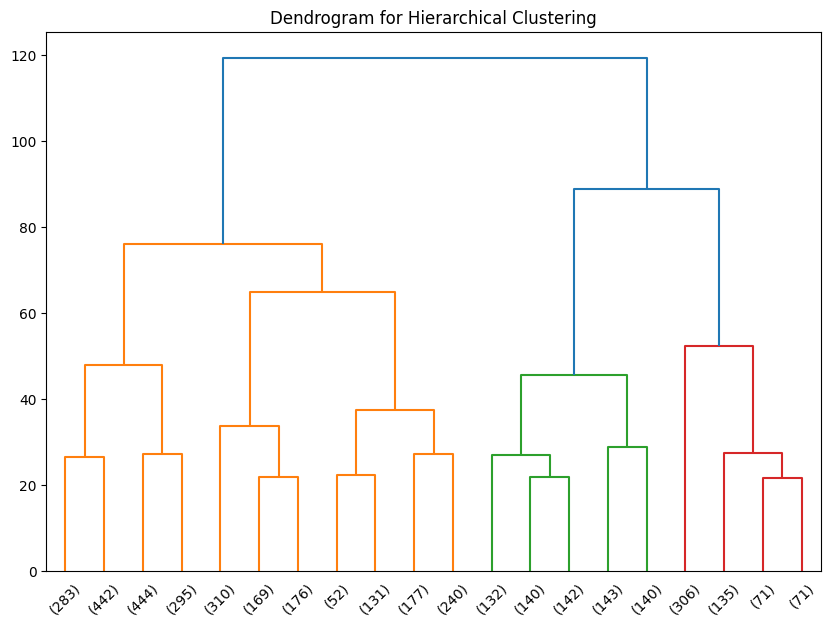

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering and plot the dendrogram
linked = linkage(scaled_df, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45, leaf_font_size=10)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Apply Agglomerative Clustering (e.g., with 3 clusters)
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
data['Hierarchical_Cluster'] = hierarchical.fit_predict(scaled_df)


## **DBSCAN Clustering:**

In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN with chosen parameters
dbscan = DBSCAN(eps=1.5, min_samples=7)
data['DBSCAN_Cluster'] = dbscan.fit_predict(scaled_df)


## **Visualization:**

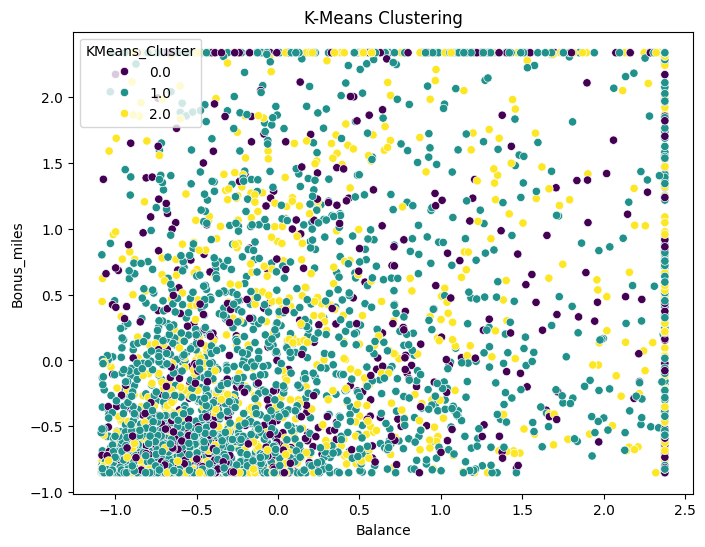

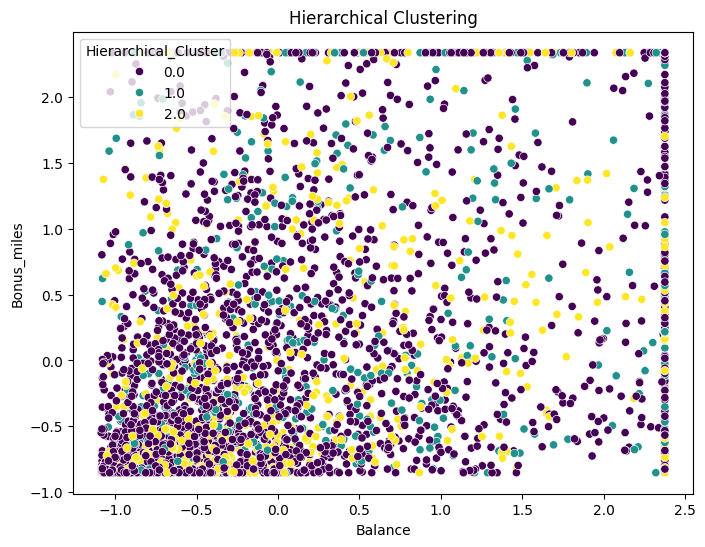

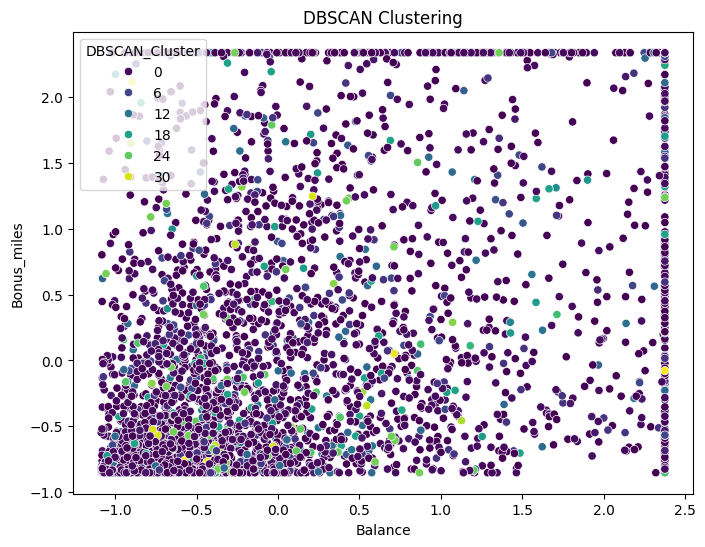

In [ ]:
# Visualizing K-Means Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df['Balance'], y=scaled_df['Bonus_miles'], hue=data['KMeans_Cluster'], palette='viridis')
plt.title('K-Means Clustering')
plt.show()

# Visualizing Hierarchical Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df['Balance'], y=scaled_df['Bonus_miles'], hue=data['Hierarchical_Cluster'], palette='viridis')
plt.title('Hierarchical Clustering')
plt.show()

# Visualizing DBSCAN Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_df['Balance'], y=scaled_df['Bonus_miles'], hue=data['DBSCAN_Cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

## **Evaluation Using Silhouette Score:**

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate the clusters
kmeans_silhouette = silhouette_score(scaled_df, data['KMeans_Cluster'])
hierarchical_silhouette = silhouette_score(scaled_df, data['Hierarchical_Cluster'])

print(f"K-Means Silhouette Score: {kmeans_silhouette:.2f}")
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.2f}")
if len(set(data['DBSCAN_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(scaled_df, data['DBSCAN_Cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.2f}")
else:
    print('DBSCAN did not find more than one cluster.')



K-Means Silhouette Score: 0.33
Hierarchical Silhouette Score: 0.26
DBSCAN Silhouette Score: -0.17
